# Basic Image Manipulation

This Notebook can be used to work through loading fits images into python and some basic manipulation, including making a three colour image from fits images with WCS (world co-ordinate system) information in their header. 

This is largely based on this really awesome tutorial on making three colour images from fits files with WCS headers: https://github.com/CKrawczyk/jupyter_data_languages/blob/master/Fits_images.ipynb

You might also find useful this basic tutorial on python plotting which includes some exploration of the data in JPG images: https://github.com/karenlmasters/ComputationalPhysicsUnit/blob/master/GraphicsVisualisation/Graphics_Visualisation.ipynb

Sources of astronomical .fits files to play with: 
* Hubble Space Telescope https://www.spacetelescope.org/projects/fits_liberator/datasets/
* SDSS: http://skyserver.sdss.org/dr15/en/tools/explore/Summary.aspx?id=1237648720693755918 (this is a specific location, but you can go anywhere in SDSS and grab three colour fits images)

Other resources
* Documentation for Astropy Fits Handling: http://docs.astropy.org/en/stable/io/fits/
* Astropy: make RGB images: http://docs.astropy.org/en/stable/visualization/rgb.html
* Tutorial: http://www.astropy.org/astropy-tutorials/FITS-images.html


In [16]:
#import statements may not all be needed
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np

#Module for CCD processing
import ccdproc

#for 3 colour images
from astropy.visualization import make_lupton_rgb

#Aliging images
from astropy.wcs import WCS

#Nicer plot styles
from astropy.visualization import astropy_mpl_style, stretch, interval, mpl_normalize
plt.style.use(astropy_mpl_style)

#Plot inline
%matplotlib inline

# Location of data
file_root = "HSTAntennae/"

In [4]:
#Import data
red = fits.open(file_root+"red.fits")
blue=fits.open(file_root+'blue.fits')
green=fits.open(file_root+'green.fits')

#Extract the image data (usually in extension 0)
redimg=red[0].data
blueimg=blue[0].data
greenimg=green[0].data

# Get size of images
print,redimg.shape, greenimg.shape, blueimg.shape


(<function print>, (1075, 1055), (1061, 1055), (1075, 1055))

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 5.00000e+00,
        1.97000e+02, 4.55630e+04, 9.02110e+04, 7.15180e+04, 5.22500e+04,
        5.25140e+04, 4.36340e+04, 3.08560e+04, 3.01600e+04, 1.04315e+05,
        2.67490e+04, 2.07130e+04, 2.25190e+04, 1.79820e+04, 2.24780e+04,
        1.76500e+04, 1.73960e+04, 1.36910e+04, 9.97100e+03, 1.18880e+04,
        1.00870e+04, 1.18170e+04, 9.48700e+03, 1.06210e+04, 8.62500e+03,
        9.86900e+03, 7.75200e+03, 9.30700e+03, 9.55800e+03, 7.97800e+03,
        9.19300e+03, 7.80700e+03, 9.29100e+03, 7.74800e+03, 9.47600e+03,
        7.70300e+03, 8.87000e+03, 8.54900e+03, 6.90700e+03, 7.81000e+03,
        6.30500e+03, 7.27900e+03, 5.64500e+03, 6.59000e+03, 5.23800e+03,
        6.04200e+03, 5.02400e+03, 5.76100e+03, 5.63800e+03, 4.70200e+03,
        5.39800e+03, 4.46400e+03, 5.31300e+03, 4.29800e+03, 5.17600e+03,
        4.16900e+03, 4.98500e+03, 4.67700e+03, 3.60300e+03, 4.37900e+03,
        3.62100e+03, 4.16400e+03, 3.41500e+03, 3.98

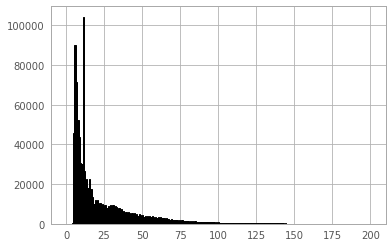

In [5]:
#Histogram of pixel values (helps to determine range for a 2D plot)
plt.hist(redimg.ravel(), bins=256, range=[0,200], fc='k', ec='k')

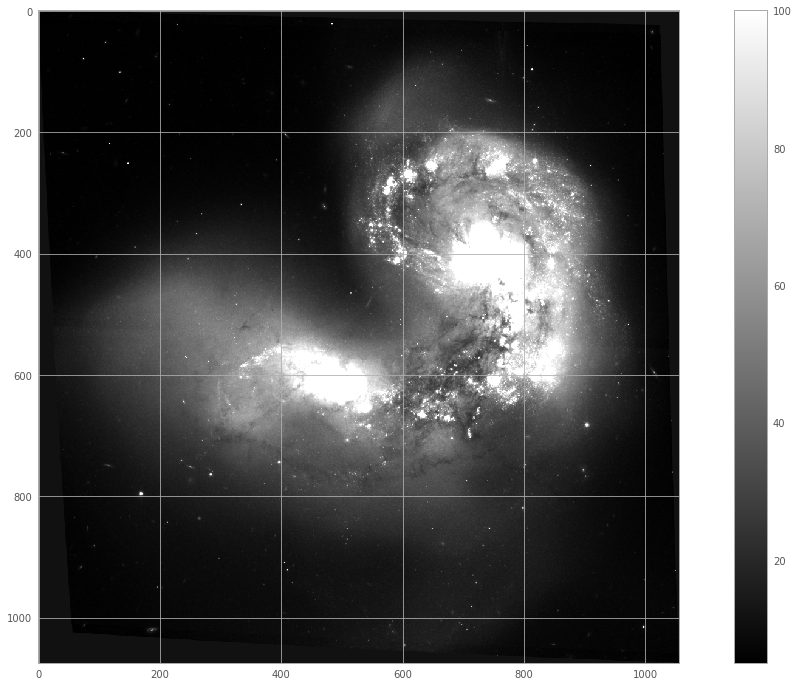

In [6]:
#Visualisation of a fits image
plt.imshow(redimg, cmap='gray', aspect='equal', interpolation='none')
plt.colorbar() 
plt.clim(5, 100)
plt.gcf().set_size_inches(20,12)

In [7]:
#Fits headers

redhead=red[0].header
redhead

SIMPLE  =                    T  /  FITS STANDARD                                
BITPIX  =                  -32 / FITS BITS/PIXEL                                
NAXIS   =                    2  /  NUMBER OF AXES                               
NAXIS1  =                 1055  /                                               
NAXIS2  =                 1075  /                                               
ORIGIN  = 'KPNO-IRAF'           /                                               
DATE    = '2005-08-11T21:34:10'                                                 
IRAFNAME= 'j91k10070_step7.fits'  /  NAME OF IRAF IMAGE FILE                    
IRAF-MAX=           9.226922E3  /  DATA MAX                                     
IRAF-MIN=           3.461788E0  /  DATA MIN                                     
IRAF-BPX=                   32  /  DATA BITS/PIXEL                              
IRAFTYPE= 'REAL    '            /  PIXEL TYPE                                   
ORIGIN  = 'NOAO-IRAF FITS Im

In [8]:
print,redhead['targname']

(<function print>, 'N4038+39-MIDDLE')

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


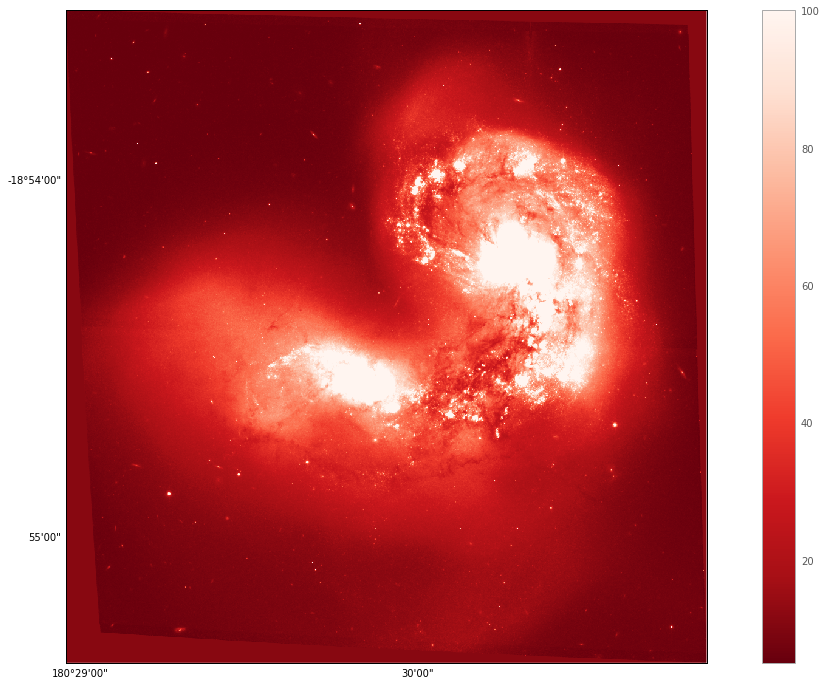

In [9]:
#Colour images

#Visualisation of a fits image in something other than grey scale, and including sky co-ordinates from WCS
plt.subplot(projection=WCS(redhead))
plt.imshow(redimg, cmap='Reds_r', aspect='equal', interpolation='none')
plt.colorbar() 
plt.clim(5, 100)
plt.gcf().set_size_inches(20,12)

In [11]:
#Reproject the blue and green onto the red array

from reproject import reproject_interp

newblue, bfootprint = reproject_interp(blue, redhead)
newgreen, gfootprint = reproject_interp(green, redhead)

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]
INFO: 
             

In [14]:
#Function from Coleman Krawczyk to make a sensible scale
def logScaleImage(image, return_full=False):
    # create the normalization function
    reagon = interval.AsymmetricPercentileInterval(10., 99.95)
    # pull out the min and max vales for this normalization
    vmin, vmax = reagon.get_limits(image)
    # define the `a` value for the log stretch in terms of these limits
    a = vmax/vmin - 1
    # create the stretching function
    scale = stretch.LogStretch(a=a)
    # compose the two functions and apply it to the image
    image_scaled = (scale + reagon)(image)
    if return_full:
        # if `return_full` flag is set return normlaization and stretch info as well
        return image_scaled, vmin, vmax, scale
    # return the final normalized and stretched image
    return image_scaled

In [17]:
#Make a three colour image
img = np.zeros((redimg.shape[0], redimg.shape[1], 3), dtype=float)
img[:,:,0] = logScaleImage(redimg)
img[:,:,1] = logScaleImage(newgreen)
img[:,:,2] = logScaleImage(newblue)

In [18]:
plt.imsave('AntennaeColour.png', img)

/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


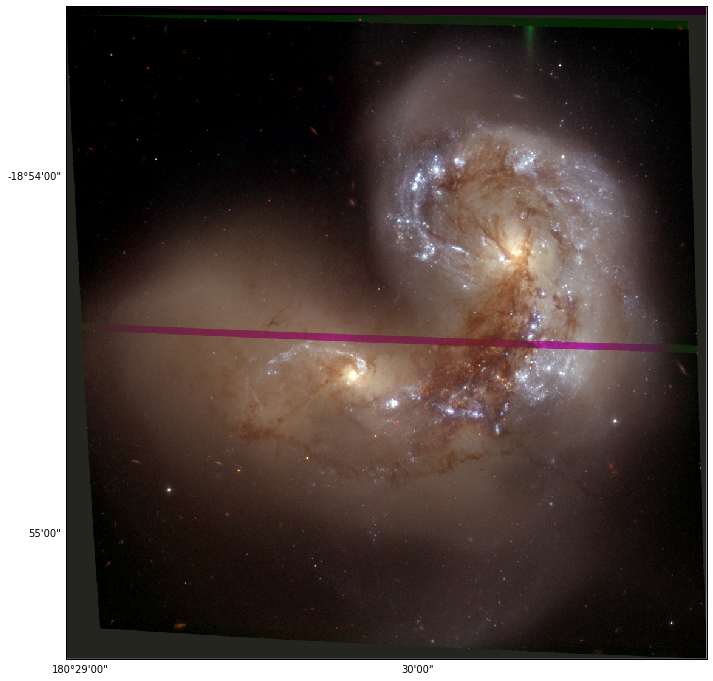

In [19]:
plt.subplot(projection=WCS(redhead))
plt.imshow(img, aspect='equal', interpolation='none')
#plt.clim(5, 100)
plt.gcf().set_size_inches(20,12)